# Visualisation de données avec Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
food = pd.read_csv("data/openfoodfacts_short.csv", sep=',')

In [3]:
food.head()

,allergens,product_name,fat_100g,energy_100g,sugars_100g,carbohydrates_100g,fiber_100g,proteins_100g,potassium_100g
0,NaN,Vitória crackers,7.0,1569.0,15.0,70.1,NaN,7.8,NaN
1,NaN,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Sfiudwx,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Sauce Sweety chili 0%,0.0,88.0,0.4,4.8,NaN,0.2,NaN
4,NaN,Mini coco,3.0,251.0,3.0,10.0,NaN,2.0,NaN


## [Matplotlib](https://matplotlib.org/users/index.html)

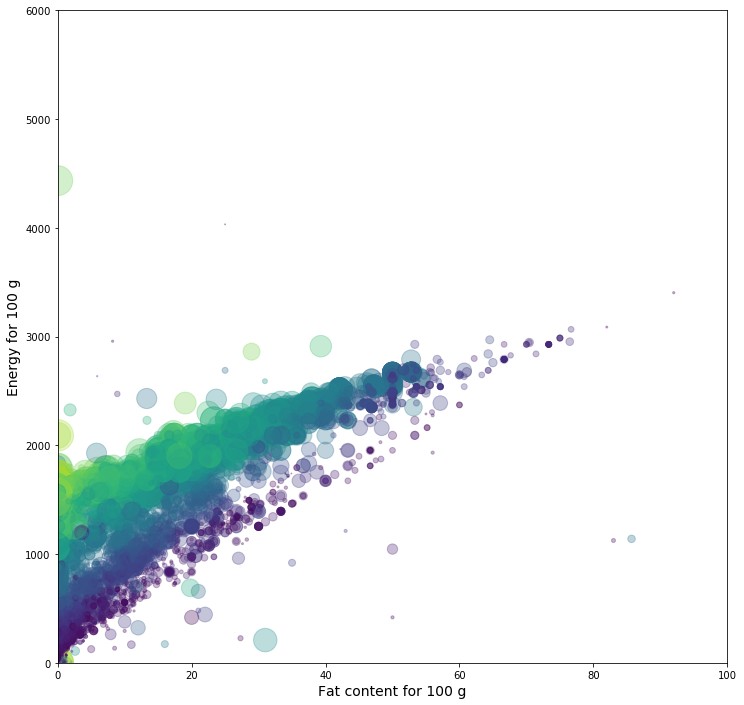

In [4]:
fig, ax = plt.subplots()

ax.scatter(
    food['fat_100g'],
    food['energy_100g'],
    s=food['sugars_100g']*10,
    c=food['carbohydrates_100g'],
    cmap="viridis",
    alpha=0.3
)
ax.set_xlabel("Fat content for 100 g", fontsize=14)
ax.set_ylabel("Energy for 100 g", fontsize=14)
ax.set_xlim(0, 100)
ax.set_ylim(0, 6000)

fig.set_size_inches(12, 12)

## [Plotly / Dash](https://dash.plot.ly/)

## [Bokeh](https://bokeh.pydata.org/en/latest/docs/user_guide.html)

In [26]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook

In [6]:
output_notebook()

Loading BokehJS ...

In [34]:
TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"

x = food['fat_100g']
y = food['energy_100g']
food['radii'] = food['sugars_100g']/50
food['colors'] = food['carbohydrates_100g'] / food['carbohydrates_100g'].max()

TOOLTIPS=[
    ("Product", "@product_name"),
    ("Carbohydrates", "@carbohydrates_100g"),
]
source = ColumnDataSource(data=food)
# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(0, 100), y_range=(0, 6000), tooltips=TOOLTIPS)

# add a circle renderer with vectorized colors and sizes
p.circle(
    x='fat_100g',
    y='energy_100g',
    radius='radii',
    fill_alpha=0.1,
    line_color=None,
    #fill_color="carbohydrates_100g",
    source=source
)

# show the results
show(p)

## [Altair](https://altair-viz.github.io/getting_started/starting.html)

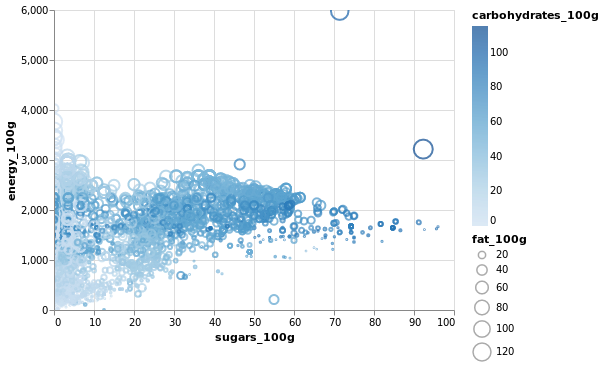

In [14]:
import altair as alt
alt.renderers.enable('notebook')


source = food.iloc[:4500]

brush = alt.selection(type='interval')

points = alt.Chart(source).mark_point(clip=True).encode(
    x=alt.X('sugars_100g', scale=alt.Scale(domain=(0, 100))),
    y=alt.Y('energy_100g', scale=alt.Scale(domain=(0, 6000))),
    tooltip=['product_name'],
    color='carbohydrates_100g',
    size='fat_100g'
)


points